# Sentiment Analysis, V1

In [8]:
import nltk
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import os

---
## PRE-PROCESSING
### TOKENIZATION
#### Intro to tokenization
Tokenization is simply breaking text down into "tokens" which, in this case, is words!
Here is a sample sentence. It can have punctuation, CAPS!, etc.

In [93]:
example_text = "Kendra loves cats. In fact, she has TEN cats. If she didn't have a house, a husband and a graduate degree in data science, she'd be a cat lady!"
tokenized_example = word_tokenize(example_text)
print(tokenized_example)

['Kendra', 'loves', 'cats', '.', 'In', 'fact', ',', 'she', 'has', 'TEN', 'cats', '.', 'If', 'she', 'did', "n't", 'have', 'a', 'house', ',', 'a', 'husband', 'and', 'a', 'graduate', 'degree', 'in', 'data', 'science', ',', 'she', "'d", 'be', 'a', 'cat', 'lady', '!']


### FREQUENCY DISTRIBUTIONS
After turning the words into tokens, we can start to treat them a data
For example, we can use a FREQUENCY DISTRIBUTION to count the words

In [94]:
fdist = FreqDist(tokenized_example)
print(fdist.items())

dict_items([('Kendra', 1), ('loves', 1), ('cats', 2), ('.', 2), ('In', 1), ('fact', 1), (',', 3), ('she', 3), ('has', 1), ('TEN', 1), ('If', 1), ('did', 1), ("n't", 1), ('have', 1), ('a', 4), ('house', 1), ('husband', 1), ('and', 1), ('graduate', 1), ('degree', 1), ('in', 1), ('data', 1), ('science', 1), ("'d", 1), ('be', 1), ('cat', 1), ('lady', 1), ('!', 1)])


In [52]:
# We can use the same Frequency Distribution to find the most common word
print(fdist.most_common(1))

[('a', 4)]


In [53]:
# We can use the Frequency Distribution to find the frequency of specific words
print(fdist.freq("cat")) 

0.02702702702702703


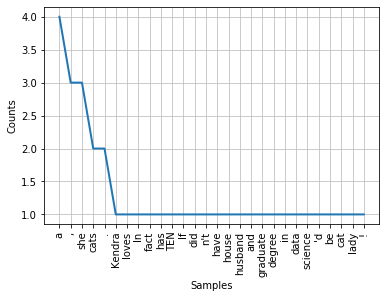

In [54]:
# And we can use the Frequency Distribution to graph our sentence by word freqency
fdist.N()
fdist.plot(30,cumulative=False)
plt.show()

#### But... the word "a" doesn't really tell us much about that sentence, does it?
Good note! "a" is what is considered to be a STOPWORD

### STOPWORDS

In [95]:
stop_words = set(stopwords.words("english"))
print(stop_words)

{"haven't", 'why', 'so', "mightn't", 'your', "won't", 'm', 'for', "isn't", 'between', 'this', 'didn', "you're", 'ain', 'not', "it's", 'itself', 'what', 'some', 'now', 'll', 'by', 'but', 'nor', 'ourselves', 'those', 'yours', 'of', 'she', 'to', 'doesn', 'until', "needn't", 'herself', 'is', 'our', 'does', 'then', 'from', 'haven', "hadn't", 'or', "she's", 'over', "didn't", 'are', 'will', "shan't", 'very', 'too', 'had', 'off', 'through', 'he', 're', 'under', 'myself', 'when', 'don', 'each', 'be', 'ours', 'most', 'o', 'y', 'am', 'hers', 'which', 'can', 'yourselves', 'wasn', 'd', 'there', "shouldn't", 'wouldn', 'whom', 'into', 'an', 'in', 'a', 'just', 'you', 'them', "that'll", 'theirs', "weren't", 'they', 'it', 'been', 'having', 'that', 'themselves', 'and', 'about', 'further', "wouldn't", "you'll", 'as', 'my', "wasn't", 'needn', "doesn't", 'its', 'won', 'again', 'where', 'mustn', 'than', "you'd", 'both', "should've", 'weren', 'being', 'shouldn', 'me', 'ma', 'were', 'hasn', "hasn't", 'more', '

### REMOVING STOPWORDS

In [96]:
filtered_text=[]
for w in tokenized_example:
    if w not in stop_words:
        filtered_text.append(w)
print("Tokenized text:",tokenized_example)
print("Filterd text:",filtered_text)

Tokenized text: ['Kendra', 'loves', 'cats', '.', 'In', 'fact', ',', 'she', 'has', 'TEN', 'cats', '.', 'If', 'she', 'did', "n't", 'have', 'a', 'house', ',', 'a', 'husband', 'and', 'a', 'graduate', 'degree', 'in', 'data', 'science', ',', 'she', "'d", 'be', 'a', 'cat', 'lady', '!']
Filterd text: ['Kendra', 'loves', 'cats', '.', 'In', 'fact', ',', 'TEN', 'cats', '.', 'If', "n't", 'house', ',', 'husband', 'graduate', 'degree', 'data', 'science', ',', "'d", 'cat', 'lady', '!']


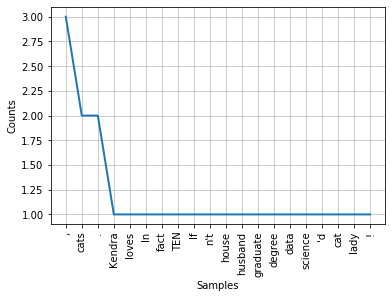

In [97]:
fdist_filtered = FreqDist(filtered_text)
fdist_filtered.plot(30,cumulative=False)
plt.show()

#### But wait, doesn't the word "cat" appear more than 2 times? 
Oh! That's because we have "cat" AND "cats" which the computer is counting as two different words!
Introducing...

### STEMMING

In [98]:
ps = PorterStemmer()
stemmed_words=[]
for w in filtered_text:
    stemmed_words.append(ps.stem(w))

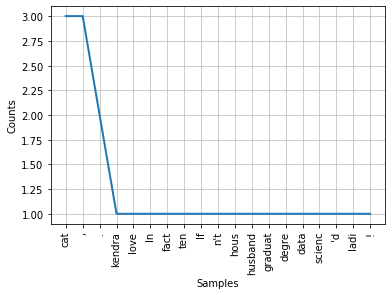

In [99]:
fdist_stemmed = FreqDist(stemmed_words)
fdist_stemmed.plot(30,cumulative=False)
plt.show()

### LEMMATIZATION
Also, Lemmatization! A side quest!
Lemmatization reduces words to their base word

In [105]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer() 
from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()
word = "carrying"
# 'v' because carrying is a verb
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

Lemmatized Word: carry
Stemmed Word: carri


In [106]:
word = "better"
# 'a' because better is an adj
print("Lemmatized Word:",lem.lemmatize(word,"a"))
print("Stemmed Word:",stem.stem(word))

Lemmatized Word: good
Stemmed Word: better


### PART-OF-SPEECH (POS) Tagging
Another side quest!!
This helps identify the grammatical group -- Noun, pronoun, adjective, verb, adverb etc 

In [107]:
sent = "Kendra loves cats. In fact, she has TEN cats. If she didn't have a house, a husband and a graduate degree in data science, she'd be a cat lady!"
Mytokens=nltk.word_tokenize(sent)
MyTAGS = nltk.pos_tag(Mytokens)
print(MyTAGS)

[('Kendra', 'NNP'), ('loves', 'VBZ'), ('cats', 'NNS'), ('.', '.'), ('In', 'IN'), ('fact', 'NN'), (',', ','), ('she', 'PRP'), ('has', 'VBZ'), ('TEN', 'VBN'), ('cats', 'NNS'), ('.', '.'), ('If', 'IN'), ('she', 'PRP'), ('did', 'VBD'), ("n't", 'RB'), ('have', 'VB'), ('a', 'DT'), ('house', 'NN'), (',', ','), ('a', 'DT'), ('husband', 'NN'), ('and', 'CC'), ('a', 'DT'), ('graduate', 'NN'), ('degree', 'NN'), ('in', 'IN'), ('data', 'NNS'), ('science', 'NN'), (',', ','), ('she', 'PRP'), ("'d", 'MD'), ('be', 'VB'), ('a', 'DT'), ('cat', 'JJ'), ('lady', 'NN'), ('!', '.')]


---
## MACHINE LEARNING
### Count Vectorizer
##### TESTING SMALL FILES FIRST

In [108]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [189]:
all_file_names = []
path="/Users/danielcaraway/Documents/IST_736_TextMining/SmallTextDocsK"
FileNameList=os.listdir(path)

# METHOD A:
# Getting a list of filenames
ListOfCompleteFiles=[]
for name in os.listdir(path):
    next=path+ "/" + name
    ListOfCompleteFiles.append(next)

# METHOD B:
# Getting the text from the filenames
AllText_AllFiles=[]
for file in ListOfCompleteFiles:
    f=open(file)
    content=f.read()
    AllText_AllFiles.append(content)
    f.close()
    
# AllText_AllFiles[0]

"Kendra loves cats. In fact, she has TEN cats. If she didn't have a house, a husband and a graduate degree in data science, she'd be a cat lady!"

In [154]:
# METHOD A (with filenames)
vec_filename = CountVectorizer(input='filename')
transformed_files = vec_filename.fit_transform(ListOfCompleteFiles)
files_feature_names = vec_filename.get_feature_names()
transformed_files_df = pd.DataFrame(transformed_files.toarray(),columns=files_feature_names)
transformed_files_df

,and,be,cartoon,cat,cats,data,degree,didn,does,fact,...,of,one,sailors,science,she,so,spinach,ten,too,wow
0,1,1,0,1,2,1,1,1,0,1,...,0,0,0,1,3,0,0,1,0,0
1,0,0,1,0,1,0,0,0,1,0,...,1,1,1,0,0,1,2,0,1,1


In [150]:
# METHOD B (with all text from files)
vec_content = CountVectorizer(input='content')
transformed_text = vec_content.fit_transform(AllText_AllFiles)
content_feature_names = vec_content.get_feature_names()
transformed_text_df = pd.DataFrame(transformed_text.toarray(),columns=content_feature_names)
transformed_text_df

,and,be,cartoon,cat,cats,data,degree,didn,does,fact,...,of,one,sailors,science,she,so,spinach,ten,too,wow
0,1,1,0,1,2,1,1,1,0,1,...,0,0,0,1,3,0,0,1,0,0
1,0,0,1,0,1,0,0,0,1,0,...,1,1,1,0,0,1,2,0,1,1


##### TESTING SMALL DATASET

In [171]:
vec_removing_sw = CountVectorizer(input='filename',
                        analyzer = 'word',
                        stop_words='english',
                        token_pattern='(?u)[a-zA-Z]+')

In [172]:
# POSITIVE FILES
path="/Users/danielcaraway/Documents/IST_736_TextMining/AI_POS"
pos_files=[]
for name in os.listdir(path):
    next=path+ "/" + name
    pos_files.append(next)

In [190]:
pos_transformed = vec_removing_sw.fit_transform(pos_files)
pos_transformed_feature_names = vec_removing_sw.get_feature_names()
pos_transformed_df = pd.DataFrame(pos_transformed.toarray(), columns = pos_transformed_feature_names)
pos_transformed_df['PoN'] = 'p'
pos_transformed_df

['advancements',
 'artificial',
 'cancer',
 'care',
 'child',
 'day',
 'daydream',
 'dog',
 'excited',
 'free',
 'given',
 'grateful',
 'gritty',
 'groceries',
 'grow',
 'intelligence',
 'kids',
 'life',
 'likely',
 'love',
 'm',
 'nitty',
 'order',
 'pay',
 'school',
 'taken',
 'taxes',
 'thanks',
 'time',
 'world',
 'yes']

In [174]:
# NEGATIVE FILES
path="/Users/danielcaraway/Documents/IST_736_TextMining/AI_NEG"
neg_files=[]
for name in os.listdir(path):
    next=path+ "/" + name
    neg_files.append(next)

In [177]:
neg_transformed = vec_removing_sw.fit_transform(neg_files)
neg_transformed_feature_names = vec_removing_sw.get_feature_names()
neg_transformed_df = pd.DataFrame(neg_transformed.toarray(), columns = neg_transformed_feature_names)
neg_transformed_df['PoN'] = 'n'
neg_transformed_df

,artificial,brains,captcha,cars,children,dog,drive,going,hack,hate,...,jobs,melt,oh,right,s,t,terrified,took,trust,PoN
0,1,0,0,0,0,0,0,0,0,0,...,2,0,1,1,1,0,0,1,0,n
1,1,0,1,1,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,n
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,n
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,n
4,1,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,n


In [183]:
combined = pos_transformed_df.append(neg_transformed_df, sort=False)
combined

,advancements,artificial,cancer,care,child,day,daydream,dog,excited,free,...,hate,jobs,melt,oh,right,s,t,terrified,took,trust
0,1.0,1,0.0,0.0,0.0,0.0,0.0,1,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,1,0.0,1.0,1.0,0.0,1.0,0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,1,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,1,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,1,1.0,0.0,1.0,1.0,0.0,0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,1,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,...,0.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
1,NaN,1,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,NaN,1,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,NaN,1,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [184]:
combined = combined.fillna(0)
combined

,advancements,artificial,cancer,care,child,day,daydream,dog,excited,free,...,hate,jobs,melt,oh,right,s,t,terrified,took,trust
0,1.0,1,0.0,0.0,0.0,0.0,0.0,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1,0.0,1.0,1.0,0.0,1.0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1,1.0,0.0,1.0,1.0,0.0,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,1,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Prepare Train and Test

In [185]:
from IPython.display import display, HTML
display(combined)

,advancements,artificial,cancer,care,child,day,daydream,dog,excited,free,...,hate,jobs,melt,oh,right,s,t,terrified,took,trust
0,1.0,1,0.0,0.0,0.0,0.0,0.0,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1,0.0,1.0,1.0,0.0,1.0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1,1.0,0.0,1.0,1.0,0.0,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,1,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
